<a href="https://colab.research.google.com/github/eneykng/file-for-data-110/blob/main/HW_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
print('setup complete')

setup complete


1. Loading the Data

Load the Iris dataset. You can find it in the seaborn library by using sns.load_dataset('iris').

Display the first few rows of the dataset to understand its structure.

In [2]:
#import dataset
df = sns.load_dataset('iris')

In [3]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2. Data Summaries

Provide summary statistics (mean, median, standard deviation, etc.) for each feature. Discuss any initial observations about scales, ranges, and typical values.

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We see that the biggest measures bellong to sepal length and the smalles to petal width.

3. Visualizations

Create histograms for each feature to understand the distributions.

Generate box plots for each feature to identify any outliers and compare distributions across different iris species.

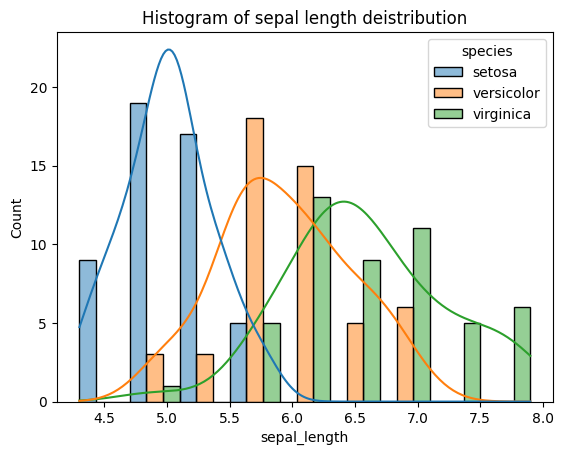

In [20]:
sns.histplot(data = df, x='sepal_length', hue = 'species', legend = True, multiple='dodge', kde=True)
plt.title('Histogram of sepal length deistribution')
plt.show()

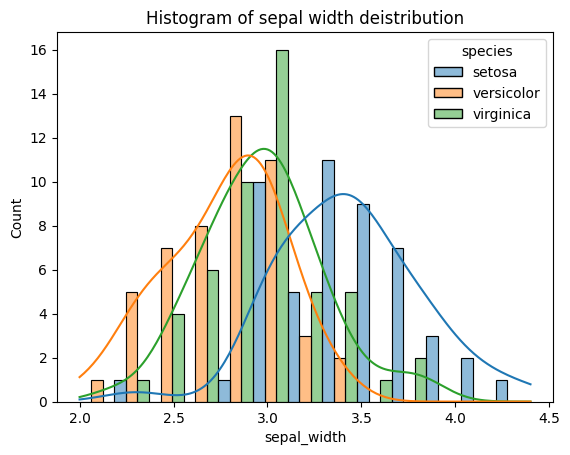

In [21]:
sns.histplot(data = df, x='sepal_width', hue = 'species', legend = True, multiple='dodge', kde=True)
plt.title('Histogram of sepal width deistribution')
plt.show()

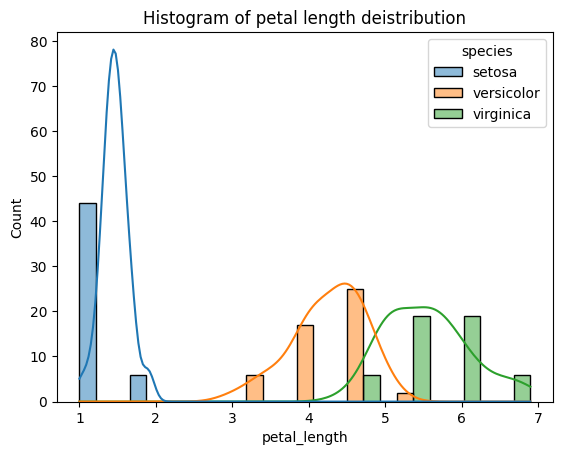

In [22]:
sns.histplot(data = df, x='petal_length', hue = 'species', legend = True, multiple='dodge', kde=True)
plt.title('Histogram of petal length deistribution')
plt.show()

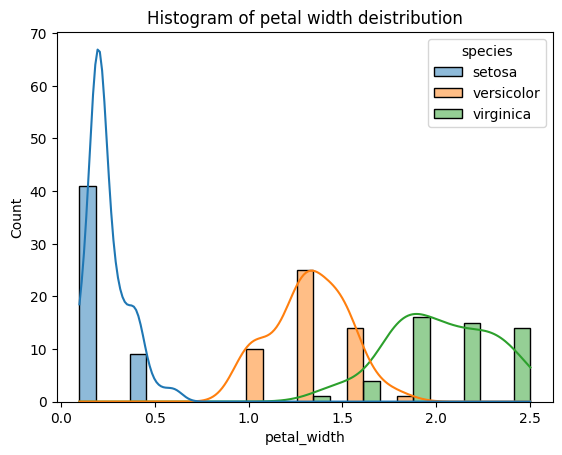

In [23]:
sns.histplot(data = df, x='petal_width', hue = 'species', legend = True, multiple='dodge', kde=True)
plt.title('Histogram of petal width deistribution')
plt.show()

Text(0.5, 1.0, 'Boxplot of sepal length for species')

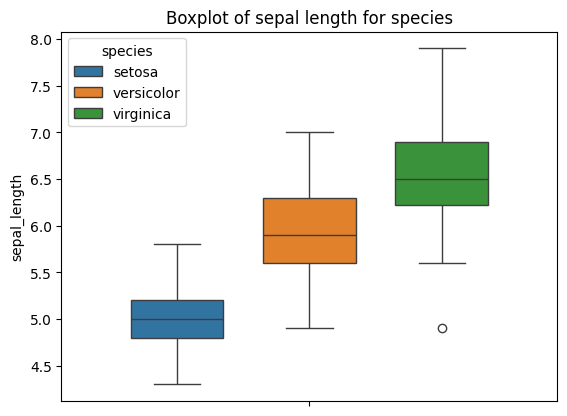

In [30]:
#Boxplots
sns.boxplot(data = df, y = 'sepal_length', hue = 'species', legend = 'auto', gap = 0.3)
plt.title('Boxplot of sepal length for species')

Text(0.5, 1.0, 'Boxplot of sepal width for species')

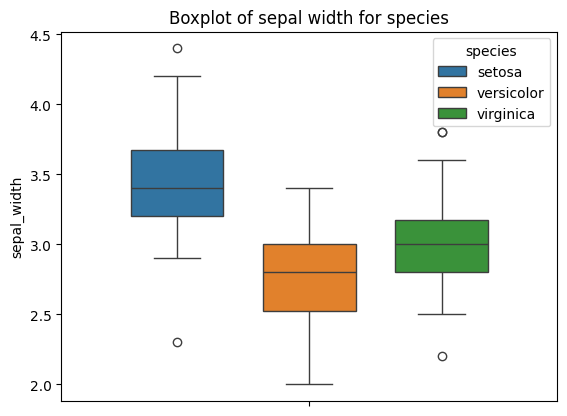

In [31]:
sns.boxplot(data = df, y = 'sepal_width', hue = 'species', legend = 'auto', gap = 0.3)
plt.title('Boxplot of sepal width for species')

Text(0.5, 1.0, 'Boxplot of petal length for species')

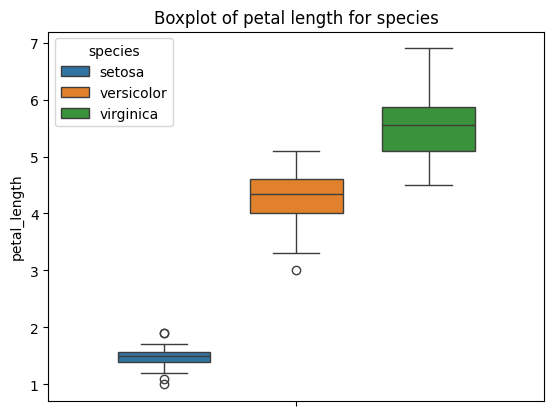

In [32]:
sns.boxplot(data = df, y = 'petal_length', hue = 'species', legend = 'auto', gap = 0.3)
plt.title('Boxplot of petal length for species')

Text(0.5, 1.0, 'Boxplot of petal width for species')

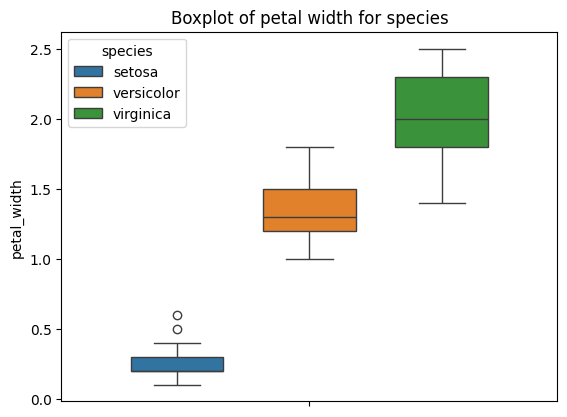

In [36]:
sns.boxplot(data = df, y = 'petal_width', hue = 'species', legend = 'auto', gap = 0.3)
plt.title('Boxplot of petal width for species')

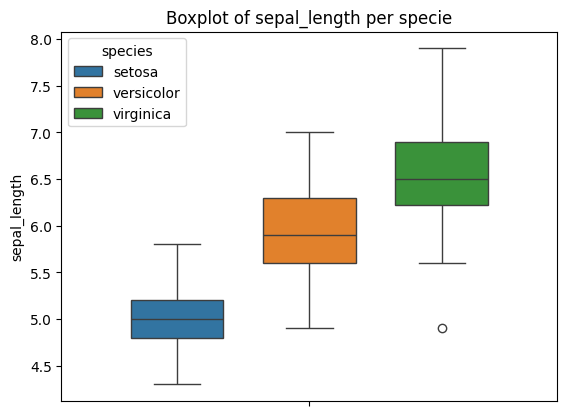

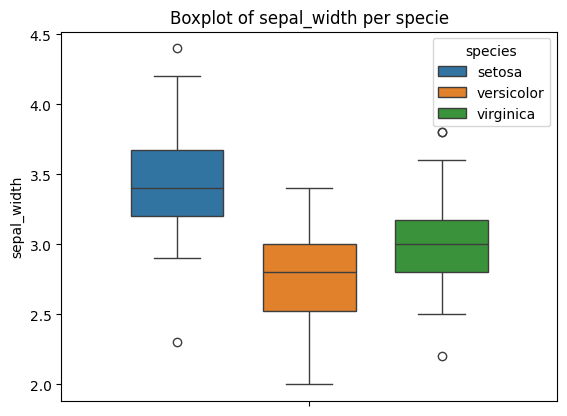

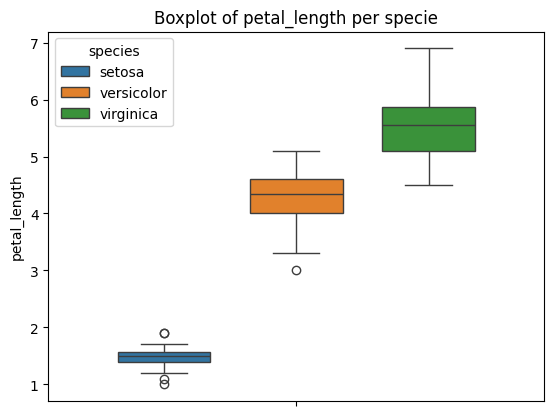

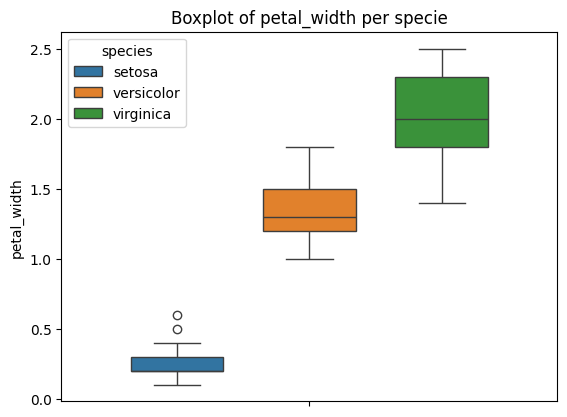

In [39]:
#same but with a loop
types = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for type in types :
  sns.boxplot(data = df, y = type, hue = 'species', legend = 'auto', gap = 0.3)
  plt.title(f'Boxplot of {type} per specie')
  plt.show()


###Part 2: Detailed Analysis by Species

1. Comparative Analysis

Use scatter plots to compare sepal length and width, as well as petal length and width. Color the points by species to explore how the species differ based on these dimensions.

Discuss any patterns or clusters that you observe in the scatter plots.

Text(0.5, 1.0, 'Scatter plot of sepal lenght and width')

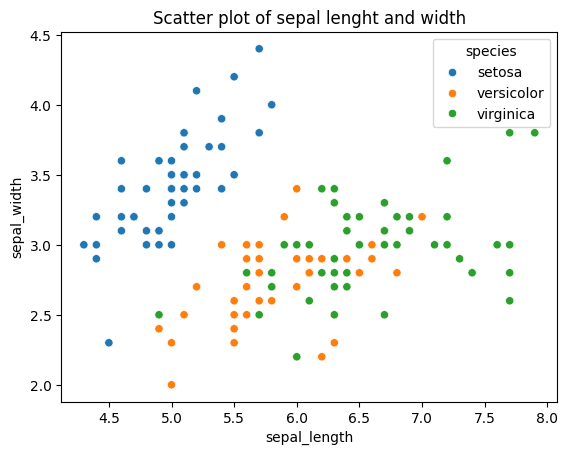

In [44]:
sns.scatterplot(data = df, x = 'sepal_length', y = 'sepal_width', hue = 'species', legend = 'auto')
plt.title('Scatter plot of sepal lenght and width')

Text(0.5, 1.0, 'Petal length and width per specie')

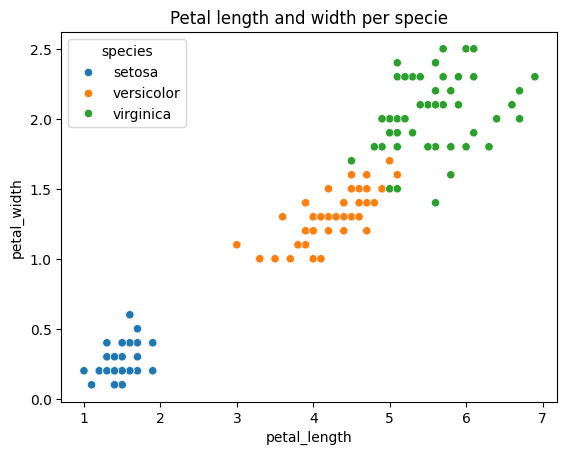

In [42]:
sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', hue = 'species', legend = 'auto')
plt.title('Petal length and width per specie')

As we can see from the scatter plot we can differenciate irises by the petal and sepal length and width. Clustering using petal measurements will be the most effective.

2. Correlation Analysis

Calculate and visualize the correlation matrix for the features. Consider using a heatmap for better clarity.

Interpret the correlations between different features. Reflect on how these relationships might differ by species if applicable.

Text(0.5, 1.0, 'Heatmap of setal and petal measurements')

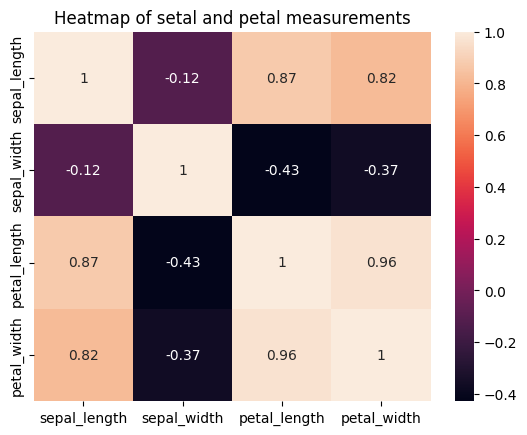

In [55]:
#create a df without species column
df_1 = df.drop(columns = 'species')

sns.heatmap(df_1.corr(), annot = True )
plt.title('Heatmap of setal and petal measurements')

We see that the strongest correlation is between petal and sepal length, petal width adn sepal length, petal lenfth and petal width( which we also abserved in scatterplot above). However, since it gives us correlation for all species, it is not very usefull, so we need to cluster data per specie.

##Part 3: Regression Analysis

1. Simple Linear Regression

Choose one dimension (e.g., petal length) as a predictor for another (e.g., sepal length). Fit a linear regression model and plot the regression line.

Evaluate the fit of the model and discuss its effectiveness in predicting the dependent variable.

Text(0.5, 1.0, 'Petal Length vs. Sepal Width')

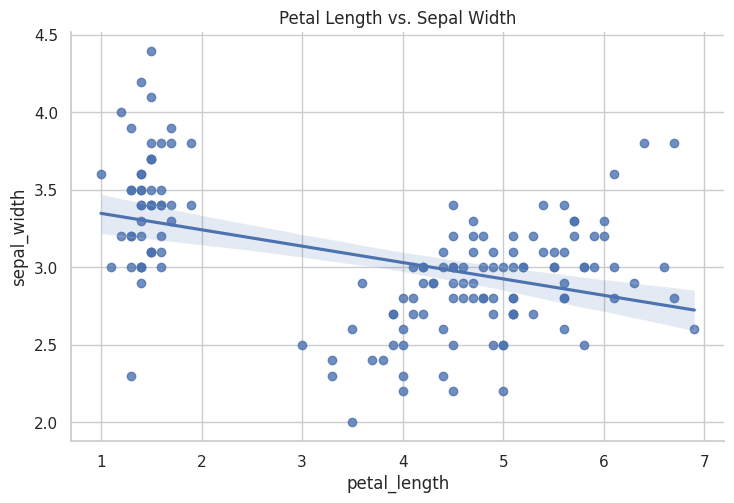

In [75]:
sns.lmplot(data = df, x = 'petal_length', y = 'sepal_width', ci = 95, height = 5, aspect = 1.5)
plt.title('Petal Length vs. Sepal Width')

This model creates a wrong regression line. We need to separate it per specie and then evaluate.

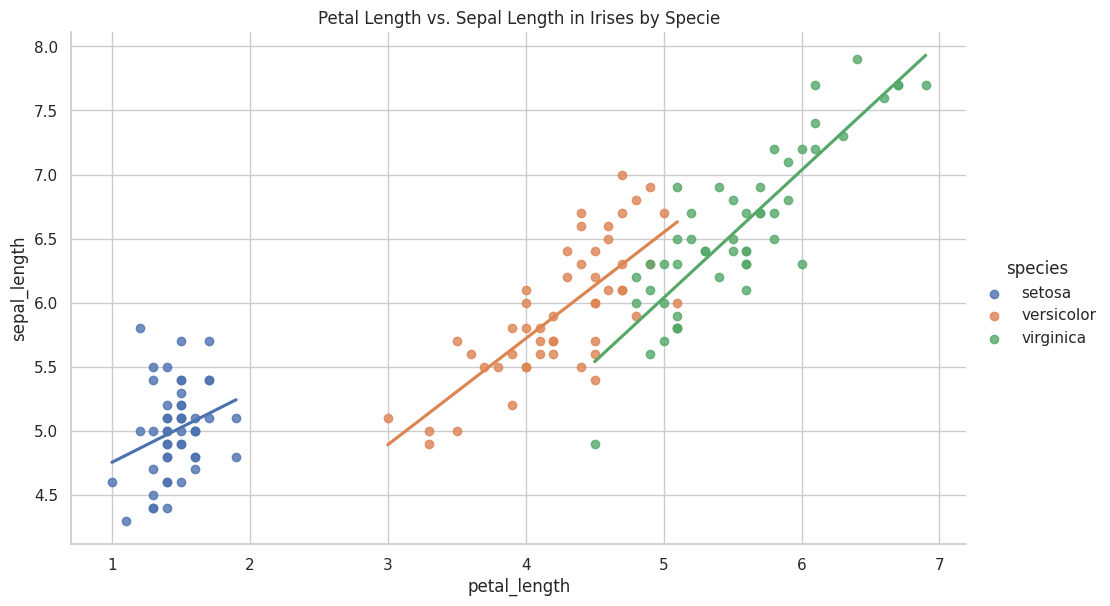

In [69]:

g = sns.lmplot(data=df, x='petal_length', y='sepal_length', hue='species',
                height=6, aspect=1.66, ci=None, markers='o')

g.set(title='Petal Length vs. Sepal Length in Irises by Specie')
plt.show()

Text(0.5, 1.0, 'Petal Length vs. Sepal Width per Species')

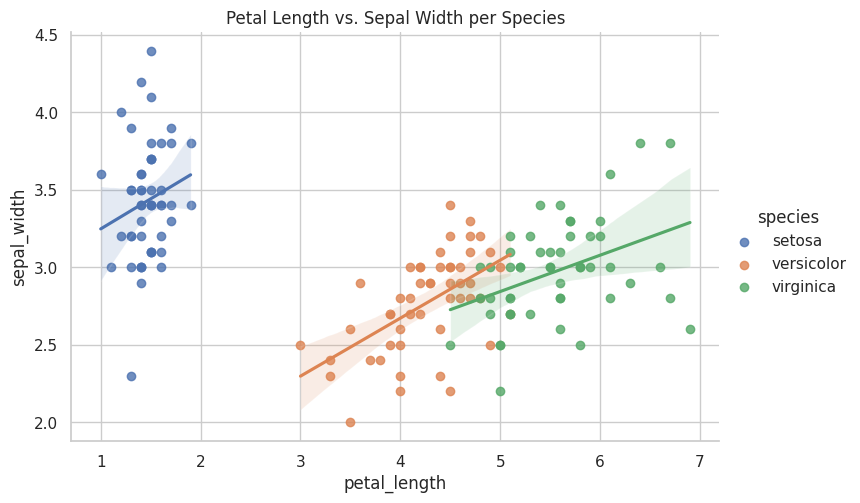

In [72]:
sns.lmplot(data = df, x = 'petal_length', y = 'sepal_width', hue = 'species', ci = 95, height = 5, aspect = 1.5)
plt.title('Petal Length vs. Sepal Width per Species')

Thes models work well for Setosa irises, however, it might get complicated to predict the measureents for Versicolor and Virginica irises using this model.

Text(0.5, 1.0, 'Sepal Length vs. Petal Width per Species')

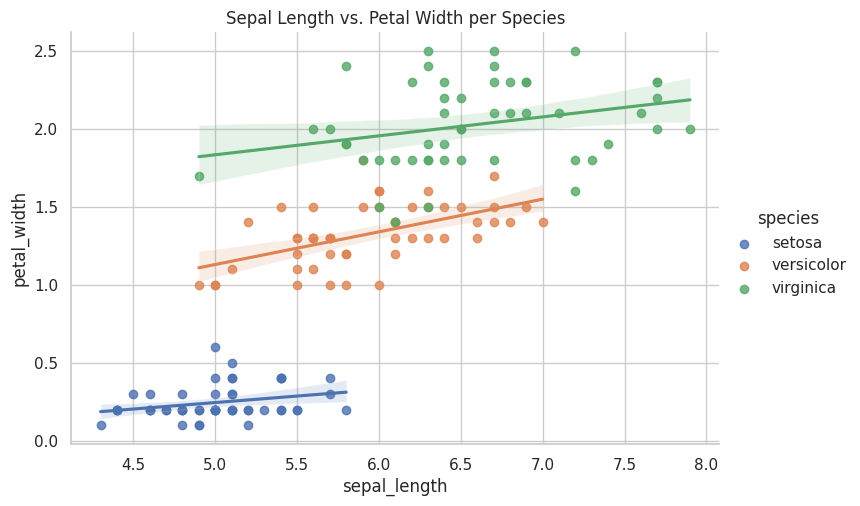

In [74]:
sns.lmplot(data = df, x = 'sepal_length', y = 'petal_width', hue = 'species', ci = 95, height = 5, aspect = 1.5)
plt.title('Sepal Length vs. Petal Width per Species')

This model has many overlaps so it will be harder to predict petal width based on sepal lenght for all species exceplt for smallest and biggest sepal length kinds.

## Summary

If we need to see what the dinamics is in the data we need to separate it in clasters. That way when we build models we don't build it for the whole set, but for groups, and it will alow us to receive more precise results.

I find multivariable linear regression the most effective since it works with data groups, instead as data set as a whole.